In [1]:
import pandas as pd
df = pd.read_csv('0522_price_volatility_binary_label.csv')
df

,stock_symbol,title,date,paragraphs,1_day_change_rate,label
0,TTWO,Take-Two Interactive Software (TTWO) Q4 2024 E...,2024-05-16,p.m. ET\r\n\r\nOperator\r\n\r\nGreetings and ...,0.012048,1
1,AMAT,Applied Materials (AMAT) Q2 2024 Earnings Call...,2024-05-16,perator\r\n\r\nWelcome to the Applied Material...,-0.009111,-1
2,DXC,DXC Technology (DXC) Q4 2024 Earnings Call Tra...,2024-05-16,"ator\r\n\r\nHello, and welcome to the DXC Tech...",-0.169014,-1
3,LSPD,Lightspeed Commerce (LSPD) Q4 2024 Earnings Ca...,2024-05-16,"Operator\r\n\r\nThank you for standing by, and...",0.021192,1
4,JD,JD.com (JD) Q1 2024 Earnings Call Transcript,2024-05-16,", and thank you for standing by for JD.com's f...",0.029180,1
...,...,...,...,...,...,...
980,PYCR,Paycor HCM (PYCR) Q1 2024 Earnings Call Transc...,2023-11-08,"r\r\n\r\nLadies and gentlemen, thank you for s...",0.044258,1
981,DUOL,Duolingo (DUOL) Q3 2023 Earnings Call Transcript,2023-11-08,"van\r\n\r\nGood evening, everyone. If you have...",0.213726,1
982,AFRM,Affirm (AFRM) Q1 2024 Earnings Call Transcript,2023-11-08,"d afternoon, ladies and gentlemen. Thank you f...",0.142463,1
983,CART,Instacart (CART) Q3 2023 Earnings Call Transcript,2023-11-08,Good day and thank you for standing by. Welcom...,-0.101322,-1


In [2]:
binary_df = pd.read_csv('0522_price_volatility_binary_label.csv')
binary_df

,stock_symbol,title,date,paragraphs,1_day_change_rate,label
0,TTWO,Take-Two Interactive Software (TTWO) Q4 2024 E...,2024-05-16,p.m. ET\n\nOperator\n\nGreetings and welcome ...,0.012048,1
1,AMAT,Applied Materials (AMAT) Q2 2024 Earnings Call...,2024-05-16,perator\n\nWelcome to the Applied Materials ea...,-0.009111,-1
2,DXC,DXC Technology (DXC) Q4 2024 Earnings Call Tra...,2024-05-16,"ator\n\nHello, and welcome to the DXC Technolo...",-0.169014,-1
3,LSPD,Lightspeed Commerce (LSPD) Q4 2024 Earnings Ca...,2024-05-16,"Operator\n\nThank you for standing by, and wel...",0.021192,1
4,JD,JD.com (JD) Q1 2024 Earnings Call Transcript,2024-05-16,", and thank you for standing by for JD.com's f...",0.029180,1
...,...,...,...,...,...,...
980,PYCR,Paycor HCM (PYCR) Q1 2024 Earnings Call Transc...,2023-11-08,"r\n\nLadies and gentlemen, thank you for stand...",0.044258,1
981,DUOL,Duolingo (DUOL) Q3 2023 Earnings Call Transcript,2023-11-08,"van\n\nGood evening, everyone. If you haven't ...",0.213726,1
982,AFRM,Affirm (AFRM) Q1 2024 Earnings Call Transcript,2023-11-08,"d afternoon, ladies and gentlemen. Thank you f...",0.142463,1
983,CART,Instacart (CART) Q3 2023 Earnings Call Transcript,2023-11-08,Good day and thank you for standing by. Welcom...,-0.101322,-1


In [18]:
paragraphs = binary_df['paragraphs'][0].split("\n\n")
paragraphs

[' p.m. ET',
 'Operator',
 'Greetings and welcome to the Take-Two fourth quarter and fiscal year 2024 earnings call. At this time, all participants are in a listen-only mode. A brief question-and-answer session will follow the formal presentation. [Operator instructions] As a reminder, this conference is being recorded.',
 'It is now my pleasure to introduce your host, Nicole Shevins, senior vice president of investor relations and corporate communications. Thank you. You may begin.',
 'Nicole Shevins--Senior Vice President of Investor Relations and Corporate Communications',
 "Good afternoon. Thank you for joining our conference call to discuss our results for the fourth quarter and fiscal year 2024 ended March 31, 2024. Today's call will be led by Strauss Zelnick, Take-Two's chairman and chief executive officer; Karl Slatoff, our president; and Lainie Goldstein, our chief financial officer. We will be available to answer your questions during the Q&A session following our prepared re

In [20]:
paragraphs[4]

'Nicole Shevins--Senior Vice President of Investor Relations and Corporate Communications'

In [19]:
index_lengths = [len(index) for index in paragraphs]
index_lengths

[8,
 8,
 293,
 161,
 88,
 421,
 519,
 0,
 731,
 253,
 53,
 434,
 543,
 658,
 309,
 827,
 717,
 646,
 496,
 619,
 428,
 514,
 576,
 645,
 36,
 23,
 576,
 467,
 537,
 487,
 484,
 615,
 41,
 550,
 371,
 496,
 637,
 614,
 702,
 618,
 507,
 537,
 709,
 653,
 619,
 552,
 400,
 53,
 368,
 9,
 8,
 196,
 33,
 209,
 164,
 53,
 531,
 263,
 49,
 33,
 128,
 41,
 211,
 8,
 106,
 41,
 190,
 271,
 53,
 636,
 79,
 41,
 10,
 8,
 107,
 55,
 594,
 53,
 320,
 395,
 55,
 21,
 8,
 109,
 36,
 581,
 53,
 669,
 36,
 182,
 53,
 353,
 253,
 36,
 19,
 8,
 98,
 44,
 39,
 235,
 23,
 463,
 390,
 8,
 109,
 39,
 309,
 7,
 41,
 312,
 39,
 167,
 41,
 192,
 39,
 33,
 8,
 105,
 47,
 192,
 53,
 219,
 47,
 300,
 23,
 118,
 47,
 6,
 23,
 393,
 248,
 47,
 79,
 23,
 255,
 176,
 47,
 21,
 8,
 103,
 45,
 220,
 428,
 160,
 53,
 263,
 466,
 906,
 106,
 45,
 41,
 8,
 109,
 39,
 671,
 23,
 524,
 457,
 304,
 128,
 8,
 100,
 30,
 300,
 53,
 109,
 30,
 14,
 8,
 104,
 34,
 301,
 53,
 500,
 255,
 34,
 10,
 8,
 111,
 41,
 97,
 265,
 202,
 

In [26]:
paragraphs = binary_df['paragraphs'][0].split("\n\n")

# 找出每個段落長度少於 100 字符的索引
short_paragraphs = [index for index, paragraph in enumerate(paragraphs) if len(paragraph) < 200]

# 顯示對應索引的段落
for index in short_paragraphs:
    print(f"Index: {index}, len: {len(paragraphs[index])}, Paragraph: {paragraphs[index]}")

Index: 0, len: 8, Paragraph:  p.m. ET
Index: 1, len: 8, Paragraph: Operator
Index: 3, len: 161, Paragraph: It is now my pleasure to introduce your host, Nicole Shevins, senior vice president of investor relations and corporate communications. Thank you. You may begin.
Index: 4, len: 88, Paragraph: Nicole Shevins--Senior Vice President of Investor Relations and Corporate Communications
Index: 7, len: 0, Paragraph: 
Index: 10, len: 53, Paragraph: Strauss Zelnick--Chairman and Chief Executive Officer
Index: 24, len: 36, Paragraph: I'll now turn the call over to Karl.
Index: 25, len: 23, Paragraph: Karl Slatoff--President
Index: 32, len: 41, Paragraph: Lainie Goldstein--Chief Financial Officer
Index: 47, len: 53, Paragraph: Strauss Zelnick--Chairman and Chief Executive Officer
Index: 49, len: 9, Paragraph: Operator.
Index: 50, len: 8, Paragraph: Operator
Index: 51, len: 196, Paragraph: Thank you. We will now be conducting a question-and-answer session. [Operator instructions] Our first que

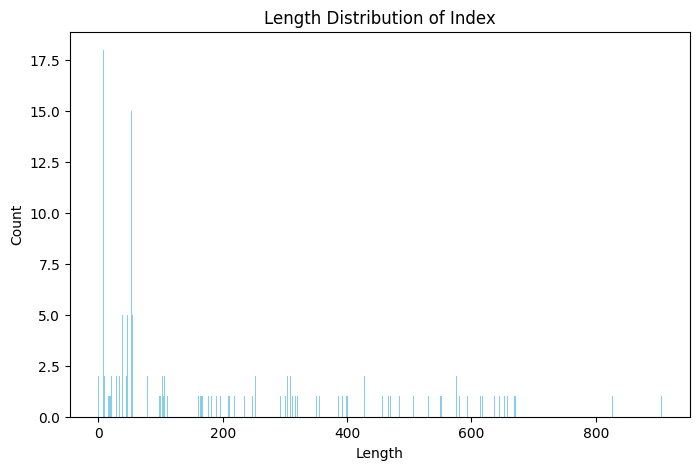

In [13]:
import matplotlib.pyplot as plt

# 計算每個不同字數的索引數量
length_count = {}
for length in index_lengths:
    if length in length_count:
        length_count[length] += 1
    else:
        length_count[length] = 1

# 繪製長度分佈圖表
plt.figure(figsize=(8, 5))
plt.bar(length_count.keys(), length_count.values(), color='skyblue')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Length Distribution of Index')
plt.show()

In [17]:
from transformers import BertTokenizer, BertModel
import torch

# 範例文字
text = "OK. And along kind of the same lines, I think a lot of people are going to be super excited about GTA VI coming out. Do you make any assumptions about the perhaps reacceleration of growth in the console installed base or console sales, you know, because your title may, you know, bring a lot of lapsed gamers back into the ecosystem in your forecasts?"

# 載入預訓練的 BERT 模型與 tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Tokenization
inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)

# 列出 token 的值
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
print("Tokens:", tokens)

# 將文字轉換為 BERT 的輸入格式
input_ids = inputs['input_ids']
attention_mask = inputs['attention_mask']

# 通過 BERT 模型進行前向傳播以提取特徵
with torch.no_grad():
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)

# 獲取最後一層的隱狀態
last_hidden_states = outputs.last_hidden_state

# 列出 embedding 的值
embeddings = last_hidden_states[0]
print("Embeddings:", embeddings)

Tokens: ['[CLS]', 'ok', '.', 'and', 'along', 'kind', 'of', 'the', 'same', 'lines', ',', 'i', 'think', 'a', 'lot', 'of', 'people', 'are', 'going', 'to', 'be', 'super', 'excited', 'about', 'gt', '##a', 'vi', 'coming', 'out', '.', 'do', 'you', 'make', 'any', 'assumptions', 'about', 'the', 'perhaps', 're', '##ac', '##cel', '##eration', 'of', 'growth', 'in', 'the', 'console', 'installed', 'base', 'or', 'console', 'sales', ',', 'you', 'know', ',', 'because', 'your', 'title', 'may', ',', 'you', 'know', ',', 'bring', 'a', 'lot', 'of', 'laps', '##ed', 'gamer', '##s', 'back', 'into', 'the', 'ecosystem', 'in', 'your', 'forecast', '##s', '?', '[SEP]']
Embeddings: tensor([[ 0.1081, -0.4911,  0.0117,  ..., -0.3023,  0.6536,  0.6259],
        [ 1.1690, -0.0619,  0.0131,  ...,  0.0337,  1.2560, -0.0471],
        [-0.0501, -0.8326,  0.0585,  ...,  0.5313,  0.9838,  0.2298],
        ...,
        [ 0.5051,  0.1518,  0.2407,  ..., -0.6937,  0.5022,  0.0826],
        [-0.4350, -0.8027, -0.8459,  ..., -0.15

In [11]:
%%time
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 讀取數據
train_df = df.copy()

# 文本預處理函數
def preprocess_text(text):
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    return text

train_df['paragraphs'] = train_df['paragraphs'].apply(preprocess_text)

# 特徵提取 - 使用TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(train_df['paragraphs'])

# 標籤
y = train_df['1_day_change_rate']

# 拆分訓練和測試數據
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估模型
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 查看部分預測結果
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

Mean Squared Error: 0.11763233147706523
       Actual  Predicted
213 -0.024920   0.068373
331  0.006703  -0.231148
501 -0.019166  -0.455563
309  0.015060   0.001834
88  -0.068714  -0.118451
CPU times: total: 2.25 s
Wall time: 4.73 s


In [13]:
%%time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from transformers import BertTokenizer, BertModel
import torch
from tqdm import tqdm

# 讀取數據
bert_df = binary_df.copy()

# BERT 模型與 tokenizer 初始化
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 定義特徵提取函數
def extract_features(paragraphs):
    inputs = tokenizer(paragraphs, return_tensors='pt', truncation=True, padding=True, max_length=512).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    # 使用 [CLS] 標記的向量作為句子的表示
    features = outputs.last_hidden_state[:, 0, :].cpu().numpy()
    return features

# 提取特徵並顯示進度條
features = []
for paragraph in tqdm(bert_df['paragraphs'], desc="Extracting features"):
    features.append(extract_features(paragraph))

bert_df['features'] = features

# 構建訓練和測試集
X = np.vstack(bert_df['features'].values)
y =bert_df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練 SVM 模型
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# 評估模型
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

Extracting features: 100%|██████████| 985/985 [02:18<00:00,  7.13it/s]


              precision    recall  f1-score   support

          -1       0.41      0.55      0.47        84
           1       0.56      0.42      0.48       113

    accuracy                           0.48       197
   macro avg       0.49      0.49      0.48       197
weighted avg       0.50      0.48      0.48       197



In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from transformers import BertTokenizer, BertModel
import torch
from tqdm import tqdm

# 讀取數據
segment_df = binary_df.copy()

# BERT 模型與 tokenizer 初始化
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 定義特徵提取函數（分段處理）
def extract_features(paragraphs, max_length=512, stride=256):
    inputs = tokenizer(paragraphs, return_tensors='pt', truncation=True, padding=True, max_length=max_length).to(device)
    input_ids = inputs['input_ids'][0].tolist()
    
    features = []
    for i in range(0, len(input_ids), stride):
        chunk_ids = input_ids[i:i+max_length]
        if len(chunk_ids) < max_length:
            chunk_ids += [tokenizer.pad_token_id] * (max_length - len(chunk_ids))
        chunk_inputs = torch.tensor([chunk_ids]).to(device)
        with torch.no_grad():
            outputs = model(input_ids=chunk_inputs)
        chunk_features = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        features.append(chunk_features)
    
    return np.mean(features, axis=0)  # 將所有段落的特徵向量取平均

# 提取特徵並顯示進度條
features = []
for paragraph in tqdm(segment_df['paragraphs'], desc="Extracting features"):
    features.append(extract_features(paragraph))

segment_df['features'] = features

# 構建訓練和測試集
X = np.vstack(segment_df['features'].values)
y = segment_df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練 SVM 模型
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# 評估模型
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

Extracting features: 100%|██████████| 985/985 [02:46<00:00,  5.93it/s]


              precision    recall  f1-score   support

          -1       0.44      0.60      0.51        84
           1       0.59      0.43      0.50       113

    accuracy                           0.50       197
   macro avg       0.51      0.51      0.50       197
weighted avg       0.53      0.50      0.50       197



In [15]:
pip install sentence-transformers

   ---------------------------------------- 0.0/171.5 kB ? eta -:--:--
   -- ------------------------------------- 10.2/171.5 kB ? eta -:--:--
   ------ -------------------------------- 30.7/171.5 kB 640.0 kB/s eta 0:00:01
   ------------- ------------------------- 61.4/171.5 kB 544.7 kB/s eta 0:00:01
   ------------------------ ------------- 112.6/171.5 kB 726.2 kB/s eta 0:00:01
   ------------------------------------ - 163.8/171.5 kB 893.0 kB/s eta 0:00:01
   -------------------------------------- 171.5/171.5 kB 790.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [16]:
from transformers import BertTokenizer

# 初始化tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# 要轉換的句子
sentence = "This is an example sentence."

# 將句子轉換為token
tokens = tokenizer.tokenize(sentence)
print("Tokens:", tokens)

# 將token轉換為ID
input_ids = tokenizer.convert_tokens_to_ids(tokens)
print("Token IDs:", input_ids)

# 將句子轉換為BERT模型輸入格式
inputs = tokenizer(sentence, return_tensors='pt')
print("Model Inputs:", inputs)

Tokens: ['this', 'is', 'an', 'example', 'sentence', '.']
Token IDs: [2023, 2003, 2019, 2742, 6251, 1012]
Model Inputs: {'input_ids': tensor([[ 101, 2023, 2003, 2019, 2742, 6251, 1012,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sentence_transformers import SentenceTransformer
from tqdm import tqdm
import torch

# 讀取數據
df = binary_df.copy()

# SBERT 模型初始化
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SentenceTransformer('paraphrase-MiniLM-L6-v2', device=device)

# 定義特徵提取函數
def extract_features(paragraphs):
    embeddings = model.encode(paragraphs, convert_to_tensor=True, device=device)
    return embeddings.cpu().numpy()

# 提取特徵並顯示進度條
features = []
for paragraph in tqdm(df['paragraphs'], desc="Extracting features"):
    features.append(extract_features(paragraph))

df['features'] = features

# 構建訓練和測試集
X = np.vstack(df['features'].values)
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練 SVM 模型
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# 評估模型
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\User\.cache\huggingface\hub\models--sentence-transformers--paraphrase-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Extracting features: 100%|██████████| 985/985 [00:36<00:00, 26.91it/s]


              precision    recall  f1-score   support

          -1       0.38      0.45      0.42        84
           1       0.53      0.46      0.49       113

    accuracy                           0.46       197
   macro avg       0.46      0.46      0.45       197
weighted avg       0.47      0.46      0.46       197



In [22]:
df['features'][0]

array([-2.17935905e-01,  4.63625714e-02,  7.65781179e-02, -1.47434756e-01,
       -8.23440105e-02, -1.20712973e-01,  1.49829537e-02, -7.55880959e-03,
        1.52709752e-01,  1.78763181e-01, -1.77251920e-02, -6.85010701e-02,
       -3.12080979e-01, -1.65962726e-01, -1.50961086e-01, -1.10633239e-01,
       -6.47302717e-03, -2.17021227e-01,  3.98189574e-02,  4.09236401e-02,
        2.01332569e-03, -9.08065587e-03,  1.95513606e-01,  2.33160004e-01,
       -5.70637248e-02, -3.94896209e-01, -1.89003535e-03,  1.08723536e-01,
        5.87853119e-02, -1.24050796e-01,  2.13978633e-01,  1.50670320e-01,
        3.73916388e-01, -1.50742661e-02, -1.42881528e-01,  2.94922590e-01,
       -5.15036955e-02,  1.31954581e-01, -2.58468091e-01,  1.03780575e-01,
        8.78461357e-03, -3.71213973e-01,  7.16768503e-02, -1.52726561e-01,
        1.21567562e-01, -3.54906499e-01, -4.36779261e-02,  2.76638642e-02,
        6.04522116e-02,  4.55580726e-02, -1.55488491e-01, -4.07216884e-02,
       -5.35856821e-02,  

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BigBirdTokenizer, BigBirdForSequenceClassification, Trainer, TrainingArguments
from transformers import EvalPrediction
import torch
from torch.utils.data import Dataset
import numpy as np

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BigBirdTokenizer, BigBirdForSequenceClassification, Trainer, TrainingArguments
from transformers import EvalPrediction
import torch
from torch.utils.data import Dataset
import numpy as np

# 讀取CSV文件
bird_df = df.copy()

# 將標籤從1和-1轉換為0和1
bird_df['label'] = bird_df['label'].map({1: 1, -1: 0})

# 檢查標籤範圍
print("Unique labels in the dataset:", bird_df['label'].unique())

# 分割數據集為訓練集和測試集
train_df, test_df = train_test_split(bird_df, test_size=0.2, random_state=42)

# 加載Tokenizer和模型
tokenizer = BigBirdTokenizer.from_pretrained('google/bigbird-roberta-base')
model = BigBirdForSequenceClassification.from_pretrained('google/bigbird-roberta-base', num_labels=2)  # 假設是二分類

# 創建自定義Dataset類
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=4096):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
            padding='max_length'  # 填充到最大長度
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# 創建Dataset對象
train_dataset = TextDataset(
    texts=train_df['paragraphs'].to_list(),
    labels=train_df['label'].to_list(),
    tokenizer=tokenizer,
    max_length=4096
)

test_dataset = TextDataset(
    texts=test_df['paragraphs'].to_list(),
    labels=test_df['label'].to_list(),
    tokenizer=tokenizer,
    max_length=4096
)

# 定義計算準確率的函數
def compute_metrics(p: EvalPrediction):
    preds = np.argmax(p.predictions, axis=1)
    return {"accuracy": (preds == p.label_ids).mean()}

# 定義訓練參數
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=2,  # 調整batch size以適應大長度文本
    per_device_eval_batch_size=2,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

# 創建Trainer對象
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# 開始訓練
trainer.train()

# 保存模型
# model.save_pretrained('./saved_model')
# tokenizer.save_pretrained('./saved_model')

# 評估模型準確率
metrics = trainer.evaluate()
print(f"Accuracy: {metrics['eval_accuracy']}")


Unique labels in the dataset: [1 0]


tokenizer_config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\User\.cache\huggingface\hub\models--google--bigbird-roberta-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


spiece.model:   0%|          | 0.00/846k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/513M [00:00<?, ?B/s]

Some weights of BigBirdForSequenceClassification were not initialized from the model checkpoint at google/bigbird-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


OutOfMemoryError: CUDA out of memory. Tried to allocate 68.00 MiB. GPU 

In [17]:
import pandas as pd
# 讀取 CSV 檔案到資料框中
df = pd.read_csv('scraping_data/20240531_nasdaq_three_class_label.csv')
# 顯示資料框的前幾行
df = df.iloc[:1]
df

,stock_symbol,title,date,1_day_close,paragraphs,0_day_close,1_day_change_rate,1_day_change_binary_label,three_class_label
0,NCNO,nCino (NCNO) Q1 2025 Earnings Call Transcript,2024-05-29,30.110001,d day and thank you for standing by. Welcome t...,30.15,-0.001327,-1,0


In [18]:
import sys
import os
sys.path.append(os.path.abspath('Earnings_call-Hank'))
from finicialTextProcessor import FinancialTextProcessor
lm_dict_filepath = r'Loughran-McDonald_MasterDictionary_1993-2023.csv'
processor = FinancialTextProcessor(lm_dict_filepath)
denoised_df = processor.process_and_create_denoised_df(df)
denoised_df

Index: 2, len: 68, Paragraph: Harrison Masters--Director, Investor Relations and Strategic Finance
Index: 5, len: 0, Paragraph: 
Index: 6, len: 0, Paragraph: 
Index: 7, len: 50, Paragraph: Pierre Naude--Chairman and Chief Executive Officer
Index: 23, len: 77, Paragraph: With that, I'll turn the call over to Greg to take us through the financials.
Index: 24, len: 39, Paragraph: Greg Orenstein--Chief Financial Officer
Index: 36, len: 55, Paragraph: With that, operator, we'll open the line for questions.
Index: 37, len: 8, Paragraph: Operator
Index: 39, len: 40, Paragraph: Adam Hotchkiss--Goldman Sachs -- Analyst
Index: 41, len: 50, Paragraph: Pierre Naude--Chairman and Chief Executive Officer
Index: 46, len: 39, Paragraph: Greg Orenstein--Chief Financial Officer
Index: 48, len: 40, Paragraph: Adam Hotchkiss--Goldman Sachs -- Analyst
Index: 51, len: 39, Paragraph: Greg Orenstein--Chief Financial Officer
Index: 55, len: 40, Paragraph: Adam Hotchkiss--Goldman Sachs -- Analyst
Index: 56, len

,paragraphs,three_class_label
0,"Additionally, annual merit increases affected ...",0
1,"You know, the other thing with mix, Brent, sho...",0
2,Most of the work actually sits in quarterly an...,0
3,"Yes. So, I would remind you that consumer incl...",0
4,What I'm seeing is the same excitement. Obviou...,0
5,"Obviously, there are nuances by market, but we...",0
6,"For example, in the first quarter, an over $15...",0
7,The difficult mortgage market over the past co...,0
8,"Yeah. Brent, I think I would also view that --...",0
9,With the addition of indirect lending function...,0


In [19]:
denoised_df

,paragraphs,three_class_label
0,"Additionally, annual merit increases affected ...",0
1,"You know, the other thing with mix, Brent, sho...",0
2,Most of the work actually sits in quarterly an...,0
3,"Yes. So, I would remind you that consumer incl...",0
4,What I'm seeing is the same excitement. Obviou...,0
5,"Obviously, there are nuances by market, but we...",0
6,"For example, in the first quarter, an over $15...",0
7,The difficult mortgage market over the past co...,0
8,"Yeah. Brent, I think I would also view that --...",0
9,With the addition of indirect lending function...,0


In [14]:
denoised_df['paragraphs'][0]

"Additionally, annual merit increases affected in April, plus salaries and wages of people onboarded with the acquisitions, will contribute to a higher quarterly operating expense run rate. Also, in light of the incredible customer demand we saw at nSight for our expanded product capabilities, we plan to reinvest some of the Q1 bottom-line overperformance in sales and marketing to drive even greater adoption of our newer solutions and to more aggressively pursue the consumer lending opportunity in the credit union market. That said, we are increasing our non-GAAP operating income outlook for the full year and now expect non-GAAP operating income for fiscal '25 to be $86 million to $89 million. Full fiscal year '25 non-GAAP net income attributable to nCino per share is expected to be $0.65 to $0.68, based upon a weighted average of approximately 117 million diluted shares outstanding."